<h1 id="Mathematically-proving-idiocracy">Mathematically proving idiocracy</h1>
<p><span style="font-size: 14pt;">Ariel Simulevski, 14.12.2023</span></p>

<h2>Abstract</h2>
<p>This paper examines the probabilities for passing a multiple choice with a "Gut" by simply guessing the answers. To prove this, a simulation with three differing probability models is used. Allthough the evidence is not conclusive, there is a non-zero possibility that such a test result is realistically achievable with educated guesses.</p>
<h2 id="Introduction">Introduction</h2>
<p>As of today, I have achieved not only a passing grade, but a "<em>Gut</em>" at that, scoring 20 out of 25 points. Due to me not studying, the probability of me achieving this out of my own volition should be fairly low. In this paper, we will prove that achieving such a grade is mathematically not only possible but realistically achievable. To do so, we will model a simulation of such a test in Python, simulate students answering this test and visualize the results.</p>
<h2 id="Simulation-structure">Simulation structure</h2>
<h3 id="Test-structure">Test structure</h3>
<p>To achieve a good overview of mathematical possibilites in achieving desirable test results, we will model a multiple choice test in Python. The test will consist of 50 questions with 4 possible answers. Each question will only have one correct answer. There will be no negative points.</p>
<h3 id="Simulated-students">Simulated students</h3>
<p>Because our results would be fairly meaningless if we just ran&nbsp;<em>N</em> simulations that randomly answered the test, we will need to introduce two control groups. One where each participant made an educated guess and one in which the participant actually studied. In those, we will be raising the probability of a correct response on a question to 50% and 75% respectively.</p>
<h2 id="Code">Code</h2>
<h3 id="Probability-model">Probability model</h3>
<p>The probability model itself is just a function which accepts a correct response and returns an answer. The standard probability uses the built-in random module while the educated guess and the studied model use a base probability to calculate the boolean correctness to a given question.&nbsp;</p>

In [1]:
import random
import matplotlib.pyplot as plt
from random import choice

def standard_probability(_):
    return random.randint(1, 4)

def educated_guess_probability(correct):
    p = random.randint(0, 100)
    if p <= 50:
        return correct
    return choice([i for i in range(1, 5) if i is not correct])
        

def studied_probability(correct):
    p = random.randint(0, 100)
    if p <= 75:
        return correct
    return choice([i for i in range(1, 5) if i is not correct])

<p>To ensure the functionality of the probability models, we will visualize them in bar charts.</p>

In [2]:
N = 1000

def show_probability(title, probability_model, correct):
    probability_test = [probability_model(correct) for _ in range(N)]
    a1 = sum(1 if x == 1 else 0 for x in probability_test)
    a2 = sum(1 if x == 2 else 0 for x in probability_test)
    a3 = sum(1 if x == 3 else 0 for x in probability_test)
    a4 = sum(1 if x == 4 else 0 for x in probability_test)

    labels = ["1", "2", "3", "4"]
    plt.bar(labels, [a1, a2, a3, a4])
    plt.title(title)
    plt.show()

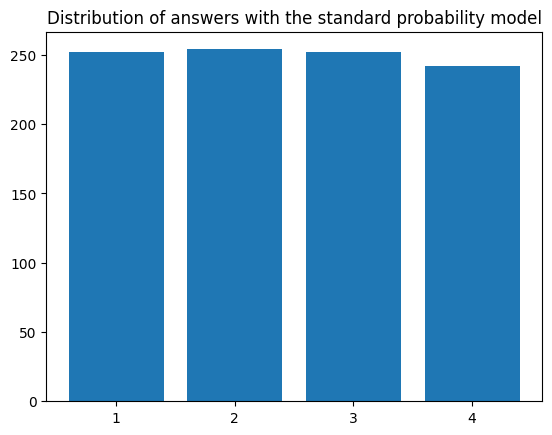

In [3]:
show_probability("Distribution of answers with the standard probability model", standard_probability, None)

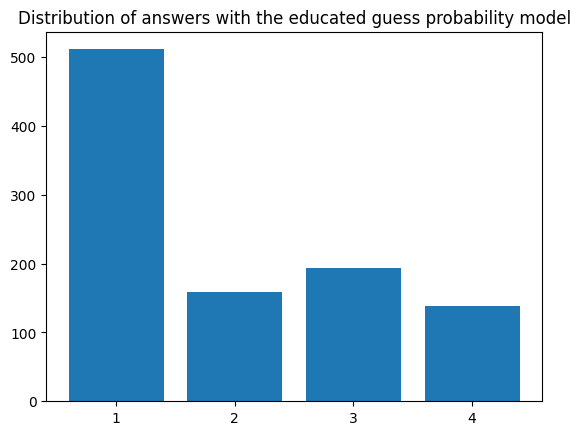

In [4]:
show_probability("Distribution of answers with the educated guess probability model", educated_guess_probability, 1)

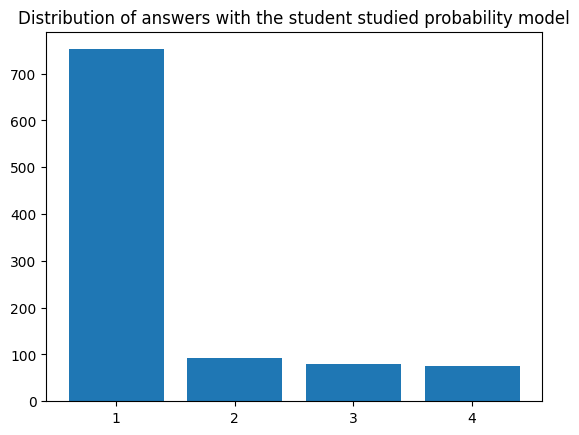

In [5]:
show_probability("Distribution of answers with the student studied probability model", studied_probability, 1)

<h3 id="Coding-the-test">Coding the test</h3>
<p>In order to simulate such a test, we will create a Python class. This class will represent a test attempt. Additionally, the class will accept a probility model which is just a function that returns an answer (1-4).</p>

In [6]:
class TestAttempt:
    def __init__(self, probability_model):
        self.answers = [False] * 50
        self.probability_model = probability_model
        
    def answer_test(self, correct):
        for i in range(len(self.answers)):
            self.answers[i] = self.probability_model(correct[i])
    
    def check_test(self, correct):
        res = 0
        for i in range(len(self.answers)):
            if self.answers[i] == correct[i]:
                res += 0.5
        return res

<h3>Coding the simulation</h3>

In [7]:
N = 100000

def simulate(title, probability_model, n):
    students = [TestAttempt(probability_model) for _ in range(n)]
    results = []

    for i in students:
        correct = [random.randint(1, 4) for _ in range(50)]
        i.answer_test(correct)
        results.append(i.check_test(correct))

    plt.title(f"{title} (N={n})")
    plt.hist(results, bins=25, range=[0, 25])
    plt.show()

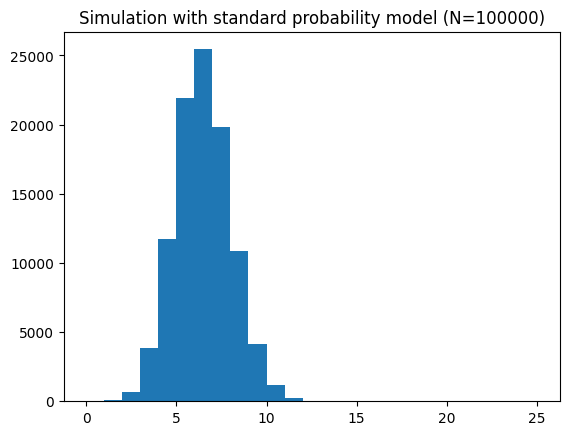

In [8]:
simulate("Simulation with standard probability model", standard_probability, N)

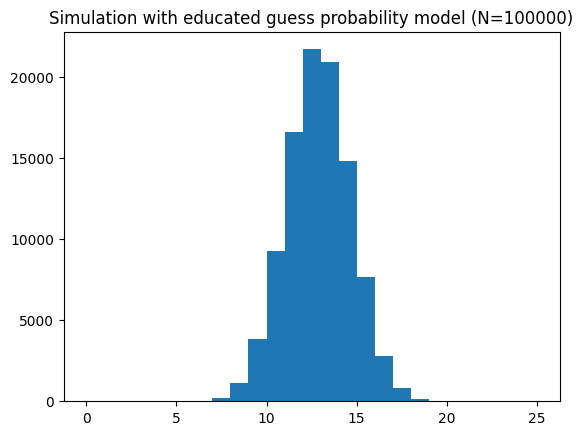

In [9]:
simulate("Simulation with educated guess probability model", educated_guess_probability, N)

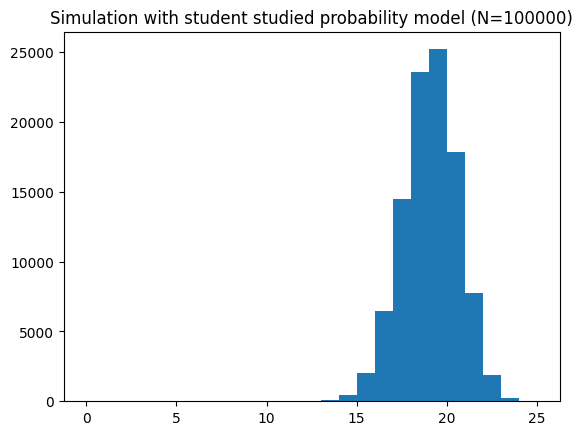

In [10]:
simulate("Simulation with student studied probability model", studied_probability, N)

<h2>Conclusion</h2>
<p>As we can see, the probability for achieving a passing grade by just guessing answers is fairly low. We cannot disprove, however, the possibility of me achieving the initially mentioned test result by just guessing. Though the probability is low, it is not zero, thus our results are inconclusive.</p>
<p>Further examination through real life testing is recommended as there are several factors not accounted for (such as cheating, deducting answers through following questions, etc.).</p>